In [1]:
import cv2
import numpy as py
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)

4.9.0


In [3]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize = [15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [4]:
path = "./images/car_1.jpg"

In [5]:
image = cv2.imread(path)

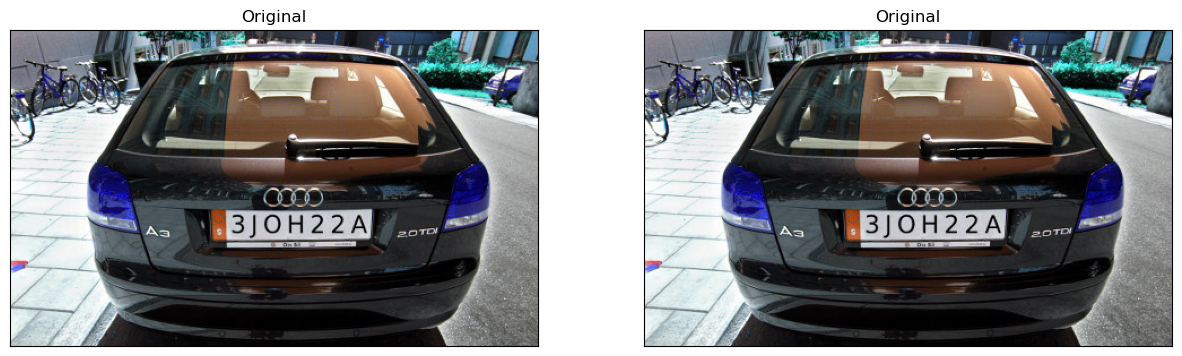

In [7]:
plot_images(image, image, title1 = "Original", title2 = "Original")

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

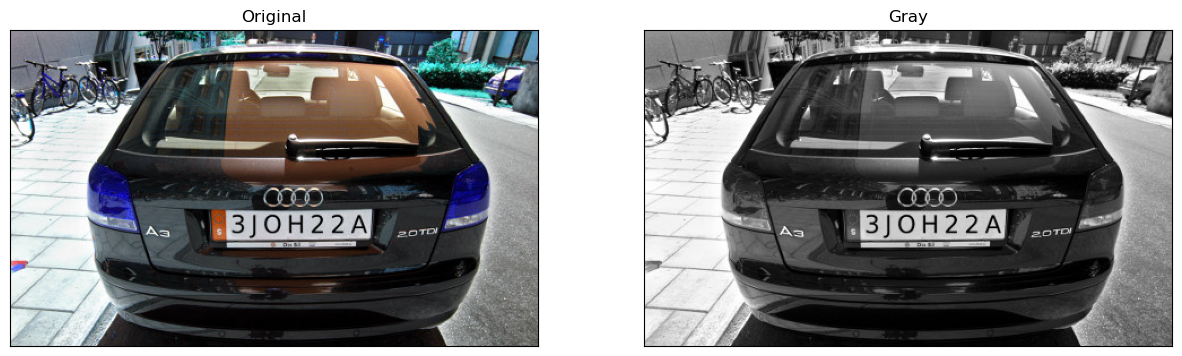

In [9]:
plot_images(image, gray, title1 = "Original", title2 = "Gray")

In [10]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)

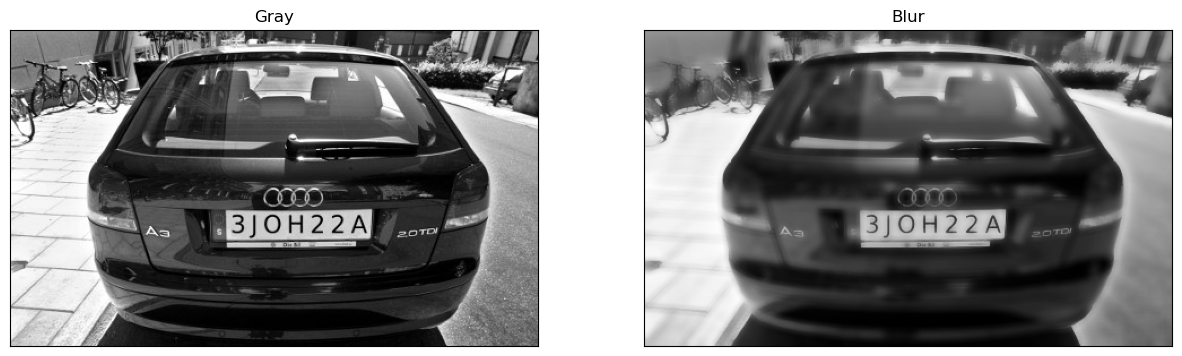

In [11]:
plot_images(gray, blur, title1 = "Gray", title2 = "Blur")

In [12]:
edges = cv2.Canny(blur, 30, 200)

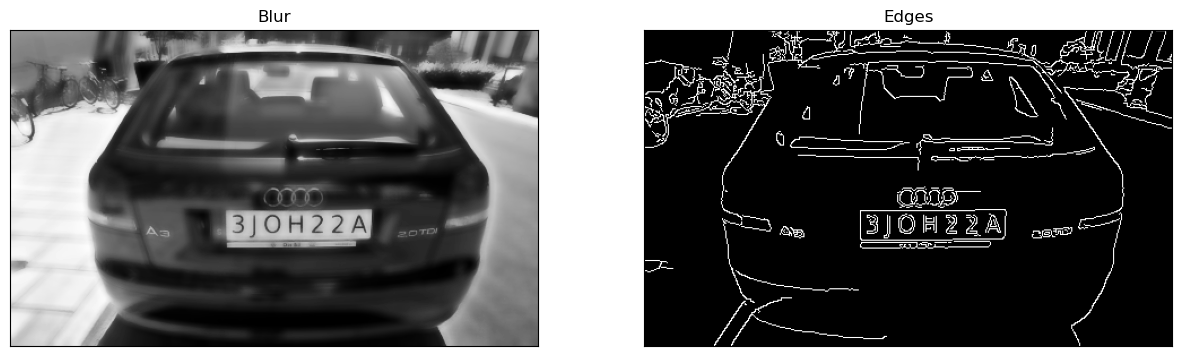

In [13]:
plot_images(blur, edges, title1 = "Blur", title2 = "Edges")

In [14]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
image_copy = image.copy()

In [18]:
_  = cv2.drawContours(image_copy, cnts, -1, (255,0,255), 2)

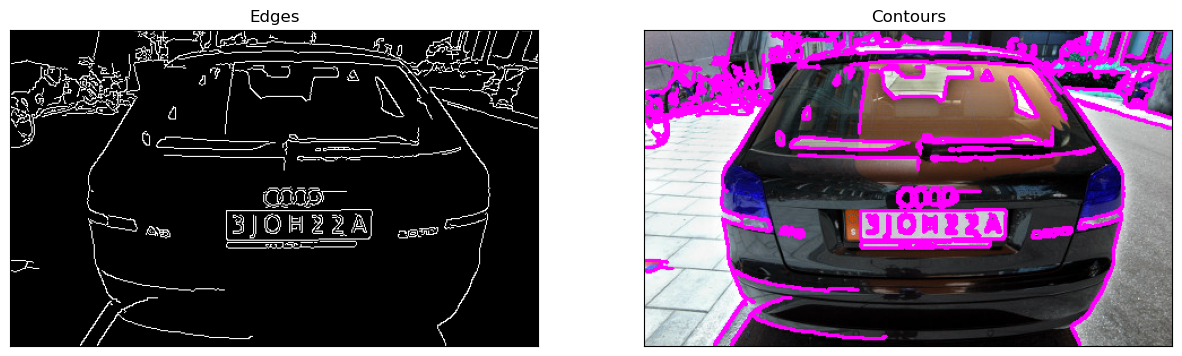

In [19]:
plot_images(edges, image_copy, title1 = "Edges", title2 = "Contours")

In [20]:
print(len(cnts))

194


In [23]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

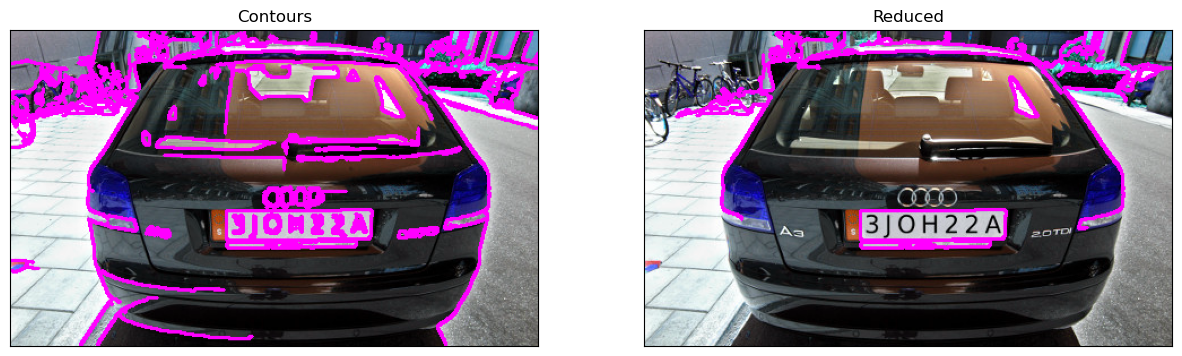

In [24]:
image_reduced_cnts = image.copy()
_  = cv2.drawContours(image_reduced_cnts, cnts, -1, (255,0,255), 2)
plot_images(image_copy, image_reduced_cnts, title1 = "Contours", title2 = "Reduced")

In [25]:
print(len(cnts))

10


In [27]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

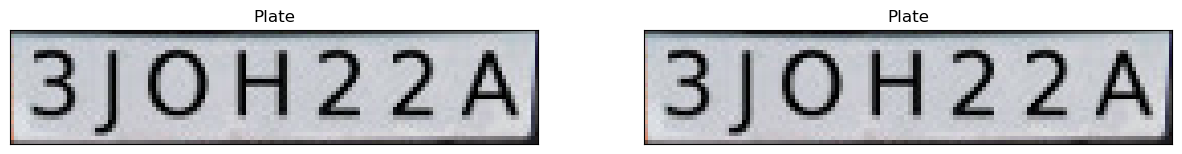

In [28]:
plot_images(plate, plate, title1 = "Plate", title2 = "Plate")

In [29]:
import pytesseract
text = pytesseract.image_to_string(plate, lang = "eng")
print(text)

3JOH22A

